In [ ]:
import numpy as np

"""
A set of utilities for simple calculations involving crystal lattices
"""
def check_vecs(V1,V2):
    """
    Simple utility to check that V1 and V1 are of the same dimension 
    """
    if np.ndim(V1) > np.ndim(V2):
        np.tile(V2,(np.shape(V1)[1],1))
    else :
        np.tile(V1,(np.shape(V2)[1],1))

    return [V1,V2]

def gtensor(latt):
    
    """
    return the gtensor for a given lattice
    
    Arguments:
    latt -- is a lattice object
    """
    g = np.empty([3,3])
    
    g[0,0] = latt.a**2
    g[0,1] = latt.a*latt.b*np.cos(latt.cc)
    g[0,2] = latt.a*latt.c*np.cos(latt.bb)

    g[1,0] = g[0,1]
    g[1,1] = latt.b**2
    g[1,2] = latt.c*latt.b*np.cos(latt.aa)

    g[2,0] = g[0,2]
    g[2,1] = g[1,2]
    g[2,2] = latt.c**2

    return g

def Miller(V,latt):
    """
    Calculates the Miller indicies of a vector given by its fractional coordinates 
    """
    g = latt.gtensor
    
    h = (g[0,0]*V[0] + g[1,0]*V[1] + g[2,0]*V[2])/(2.*np.pi)
    k = (g[0,1]*V[0] + g[1,1]*V[1] + g[2,1]*V[2])/(2.*np.pi)
    l = (g[0,2]*V[0] + g[1,2]*V[1] + g[2,2]*V[2])/(2.*np.pi)

    return [h,k,l]

def recip_lattice(latt):
    """
    Calculate the reciprocal lattice given a real space lattice
    Arguments:
    latt -- is a lattice object

    """
    a_vect = np.array([latt.a, 0, 0])
    b_vect = np.array([latt.b*np.cos(latt.cc), latt.b*np.sin(latt.cc), 0])
    c_vect =latt.c*np.array([np.cos(latt.bb), 
			np.sin(latt.bb)*np.cos(latt.aa)*np.sin(latt.cc), 
			np.sin(latt.aa)*np.sin(latt.bb)])
   
    vol = np.sum(a_vect * np.cross(b_vect,c_vect))
    

    a_star = 2*np.pi*latt.b*latt.c*np.sin(latt.aa)/vol
    b_star = 2*np.pi*latt.a*latt.c*np.sin(latt.bb)/vol
    c_star = 2*np.pi*latt.a*latt.b*np.sin(latt.cc)/vol

    aa_star = np.arccos((np.cos(latt.bb)*np.cos(latt.cc)-np.cos(latt.aa))/(np.sin(latt.bb)*np.sin(latt.cc)))
    bb_star = np.arccos((np.cos(latt.aa)*np.cos(latt.cc)-np.cos(latt.bb))/(np.sin(latt.aa)*np.sin(latt.cc)))
    cc_star = np.arccos((np.cos(latt.aa)*np.cos(latt.bb)-np.cos(latt.cc))/(np.sin(latt.aa)*np.sin(latt.bb)))
    
    aa_star = np.rad2deg(aa_star)
    bb_star = np.rad2deg(bb_star)
    cc_star = np.rad2deg(cc_star)

    r_latt = lattice(a_star,b_star,c_star,aa_star,bb_star,cc_star)
    return r_latt

def angle(V1,V2,latt):
    """
    Calculate the angle, in degress, between two vectors defined by miller indicies in the space of the lattice.
    Arguments:
    V1 -- miller indicies defining a vector
    V2 -- miller indicies defining a second vector
    latt -- lattice object, can be either a real space or reciprocal space lattice
    """
    
   # if not isinstance(latt_,lattice)
   #     # some sort of error
    #V1,V2 = check_vecs(V1,V2) 

    a_vect = np.array([latt.a, 0, 0])
    b_vect = np.array([latt.b*np.cos(latt.cc), latt.b*np.sin(latt.cc), 0])
    c_vect =latt.c*np.array([np.cos(latt.bb), 
			np.sin(latt.bb)*np.cos(latt.aa)*np.sin(latt.cc), 
			np.sin(latt.aa)*np.sin(latt.bb)])

    vect1 = a_vect[:,np.newaxis]*V1[0] + b_vect[:,np.newaxis]*V1[1] + c_vect[:,np.newaxis]*V1[2]
    vect2 = a_vect[:,np.newaxis]*V2[0] + b_vect[:,np.newaxis]*V2[1] + c_vect[:,np.newaxis]*V2[2]

    nrmV1 = np.sqrt(np.sum(vect1**2))
    nrmV2 = np.sqrt(np.sum(vect2**2))
    # exploit broadcasting to deal with V1 and V2 of different sizes
    angle = np.rad2deg(np.arccos((vect1[0]*vect2[0]+vect1[1]*vect2[1]+vect1[2]*vect2[2])/(nrmV1*nrmV2)))

    return angle

def angle2(V1,V2,lattice):
    """
    Calculate the angle, in radian, between two vectors in real space and in reciprocal space.
    Real space vector V1 is in fractional cell coordinates
    Reciprocal space vector V2 is in Miller indicies
    Arguments:
    V1 -- fractional real space coordinates defining a vector
    V2 -- miller indicies defining a second vector
    lattice -- lattice object, defines a real space lattice
    """

    rlatt = recip_lattice(lattice)
    phi = np.arccos((2*np.pi*(V1[0]*V2[0]+V1[1]*V2[1]+V1[2]*V2[2]))/modVec(V1,lattice)/modVec(V2,rlatt))
    
    return phi

def scalar(V1,V2,latt):
    """
    Calculates the scalar product of two vectors defined by their Miller indicies
    Arguments:
    V1 -- miller indicies defining a vector
    V2 -- miller indicies defining a second vector
    latt -- lattice object, can be either a real space or reciprocal space lattice
    """

    # calculate the scalar product of two vectors defined by their Miller indicies
    [x1,y1,z1] = V1
    [x2,y2,z2] = V2
    #(latt.cc,latt.bb,latt.aa)
    s1 = x1*x2*latt.a**2 + y1*y2*latt.b**2 + z1*z2*latt.c**2
    s2 = (x1*y2 + x2* y1) * latt.a *latt.b*np.cos(latt.cc)
    s3 = (x1*z2 + x2* z1) * latt.a *latt.c*np.cos(latt.bb)
    s4 = (z1*y2 + z2* y1) * latt.c *latt.b*np.cos(latt.aa)

    s = s1+s2+s3+s4
    
    return s    

def vector(V1,V2,latt):
    """
    Calculates the vector product of two vectors defined by their Miller indicies
    Arguments:
    V1 -- miller indicies defining a vector
    V2 -- miller indicies defining a second vector
    latt -- lattice object, can be either a real space or reciprocal space lattice
    """
    u = (V1[1]*V2[2]-V2[1]*V1[2])
    v = (V1[2]*V2[0]-V2[2]*V1[0])
    w = (V1[0]*V2[1]-V2[0]*V1[1])
    
    [X,Y,Z] = Miller([u,v,w],latt)
    
    return [X,Y,Z]

    
def modVec(V1,latt):
    """
    Calculates the magnitude of a vector defined by its Miller indicies
    Arguments:
    V1 -- Miller indicies defining a vector
    latt -- lattice object, can be either a real of reciprocal space lattice
    """

    mod = np.sqrt(scalar(V1,V1,latt))

    return mod
def dspacing(V1,r_latt):
    """
    Calculates the d spacing corresponding to a given set of Miller indicies
    Arguments:
    V1 -- Miller indicies defining a partular reflection
    r_latt -- reciprocal space lattice
    """
    d = 2*np.pi/modVec(V1,r_latt)
    return d

class lattice:
    def __init__(self,a=1.,b=1.,c=1.,aa=90.,bb=90.,cc=90.):
        self.a = a
        self.b = b
        self.c = c
        self.aa = np.deg2rad(aa)
        self.bb = np.deg2rad(bb)
        self.cc = np.deg2rad(cc)
        self.lvec = [a,b,c,np.deg2rad(aa),np.deg2rad(bb),np.deg2rad(cc)]
        self.gtensor = gtensor(self)

    def __str__(self):
        out1 = '\ta = {0:.4f}, b = {1:.4f}, c = {2:.4f} \n'.format(self.a,self.b,self.c)
        out2 = '\talpha = {0:.3f},  beta = {1:.3f}, gamma = {2:.3f} \n'.format(self.aa,self.bb,self.cc)
        out = out1 + out2
        return out 
    def __expr__(self):
        out = 'lattice constants: [{0} {1} {2}] \n angles: [{3} {4} {5}]'.format(self.a,self.b,self.c, self.aa,self.bb.self.cc)
        return out 

    def __repr__(self):
        return self.__str__()
                                 


In [ ]:
import numpy as np
from math import pi,asin,sin
import matplotlib.pyplot as plt
from math import pi,asin,sin, cos
#mpl_toolkits.axes_grid.grid_helper_curvelinear import GridHelperCurveLinear
#from mpl_toolkits.axes_grid.axislines import Subplot

#import matplotlib.pyplot as plt

def dynamic_range(Efixed,E,E_max,theta_range = [10,120],step = 10, color = 'k',showplot = True):

    #modify to allow fixed Ef or fixed Ei, and input of scattering
    #angles
    omega = np.linspace(0,E_max,100)
    theta_s = np.arange(theta_range[0]*np.pi/180,theta_range[1]*np.pi/180,step*np.pi/180)
    Q = np.empty([theta_s.size,omega.size],float)

    if Efixed == "Ef": 
        kf = np.sqrt((E)/2.072)
        ki = np.sqrt((omega+E)/2.072)
    elif Efixed =="Ei":
        ki = np.sqrt((E)/2.072)
        kf = np.sqrt((E-omega)/2.072)

    for i, theta in enumerate(theta_s):

        Q[i] = np.sqrt(ki**2 + kf**2 - 2*ki*kf*np.cos(theta))
        
        if showplot:
            plt.plot(Q[i],omega,lw=1,ls = '--',color = color)
            txt = "$2\\theta_s$ = {0}$^o$".format(np.round(theta*180/np.pi,1))
            plt.text(Q[i,i+25],omega[50],txt, bbox=dict(fc = '1',lw = 0,alpha = 0.05),rotation = 75,color = color)
            plt.xlabel('Q ($\\AA^{-1}$)')
            plt.ylabel('Energy Transfer (meV)')
            title = 'Accessible dynamic range for {1} fixed = {0} meV'.format(E,Efixed)
            plt.title(title)
            plt.grid(True)
            plt.show()

    return omega,Q


def spec_twoTheta(Efixed,E,E_T,Q):
    
    if Efixed == "Ef": 
        kf = np.sqrt((E)/2.072)
        ki = np.sqrt((E_T+E)/2.072)
    elif Efixed =="Ei":
        ki = np.sqrt((E)/2.072)
        kf = np.sqrt((E-E_T)/2.072)

    theta =np.arccos(-(Q**2 - ki**2 - kf**2)/ki/kf/2.)
    
    return theta*180./np.pi


def Bragg_angle(wavelength,q,rlatt):

    d = dspacing(q,rlatt) 
    tth = 360./pi*asin(wavelength/d/2)
    
    print('\n')
    print( '\t d = {:2f} wavelength = {:.2f}, Q = [{:.2f} {:.2f} {:.2f}], Two-theta = {:.3f}'.format(d,wavelength,q[0],q[1],q[2],tth,d))
    return

def TOF_par(q,tth,rlatt):

    d = dspacing(q,rlatt)
    wavelength = 2*d*sin(tth*pi/360)
    E = (9.044/wavelength)**2
    k = 2*pi/wavelength
    velocity = 629.62*k # m/s
    print('Q = [{:.2f} {:.2f} {:.2f}]\n d = {:.3f} \n Two-theta = {:.2f}\n wavelength = {:.3f} Angstrom\n Energy = {:3f} meV\n Velocity = {:3f} m/s'.format(q[0],q[1],q[2],d,tth,wavelength,E,velocity)) 
    
    return d,wavelength,E,velocity

def Recip_space(sample):

    """
    Set up general reciprocal space grid for plotting Miller indicies in a general space.
    Would be cool if returned fig object had a custom transformation so that all data added
    to plot after it has been created can be given in miller indicies
    grid for custom transform.
    """
    def tr(x, y):
        x, y = np.asarray(x), np.asarray(y)
        return x, y-x

    def inv_tr(x,y):
        x, y = np.asarray(x), np.asarray(y)
        return x, y+x

    grid_helper = GridHelperCurveLinear((tr, inv_tr))    
    
    fig = plt.figure(1, figsize=(7, 4))
    ax = Subplot(fig, 1, 1, 1, grid_helper=grid_helper)

    rlatt = sample.star_lattice
    [xs,ys,zs] = sample.StandardSystem

    fig.add_subplot(ax)


    ax.grid(True)
    return

def calcQ(lattice, tth, th, wl=5, u=[1, 0, 0], v=[0, 0, 1]):

    '''
    Returns the Q value for elastic scattering in Miller Indicies for a given spectrometer configuration
    lattice - a lattice object
    tth - scattering angle, in degrees
    th - sample angle, defined such that theta =0 when u is along ki
    wl - wavelength in angstroms
    u - reciprocal lattice vector in scattering plane, theta is 0 when u is along ki
    v - second reciprocal lattice vector in scattering plane
    '''

    modQ = 4*pi/wl*sin(tth/360*pi)
    alpha = (180 - tth)/2 + th

    rlatt = recip_lattice(lattice)

    u = np.array(u)
    v = np.array(v)


    modu = modVec(u, rlatt)
    modv = modVec(v, rlatt)

    # create cartesian coordinate system from reciprocal lattice vectors
    X = u/modu
    proj = scalar(v,X,rlatt)
    Y = v - X*proj
    modY = modVec(Y, rlatt)
    Y = Y/modY

    qx = modQ*cos(alpha/180*pi)*X
    qy = modQ*sin(alpha/180*pi)*Y

    Q = qx + qy
    #print(tth,th,wl,np.round(Q,2))
    #return modQ, alpha, X,Y,Q
    return Q



def Al_peaks(wavelength = 1.0):
    
    energy = (9.044/wavelength)**2
    # Al_lattice 
    a = 4.0498; b = 4.0498; c = 4.0498
    aa =90; bb = 90; cc = 90
    
    latt = lattice(a,b,c,aa,bb,cc)  
    rlatt = recip_lattice(latt)
    # Al is FCC so peaks must be all even or all odd
    peaks = [[1,1,1],[2,0,0],[2,2,0],[3,1,1],[2,2,2],[4,0,0],[3,3,1],[4,2,0],
            [4,2,2],[5,1,1],[3,3,3],[4,4,0],[5,3,1],[4,4,2],[6,0,0]]
    
    print('\tAluminum Bragg Peaks')
    print('\tNeutron wavelength {:.2f} Angstroms ({:.2f} meV)\n'.format(wavelength,energy))
    print('\t H   K   L\tQ (AA-1)    d(AA)     2theta     2theta(l/2)     2theta(l/3)')
    print('\t----------------------------------------------------------------------------')
    
    for p in peaks:
        modQ = modVec(p,rlatt)
        dsp = dspacing(p,rlatt)
        
        if abs(wavelength/(2*dsp)) < 1:
            tth = 360/pi * asin(wavelength/(2*dsp))
            line = '\t {:d}   {:d}   {:d}\t {:.3f}      {:.3f}      {:.2f}\t   {:.2f}\t   {:.2f}'
        else :
            tth = 'NaN'
            line = '\t {:d}   {:d}   {:d}\t {:.3f}      {:.3f}      {:s}\t   {:.2f}\t   {:.2f}'
        
        if abs((wavelength/2)/(2*dsp)) < 1:
            tth2 = 360/pi * asin((wavelength/2)/(2*dsp))
        else :
            tth2 = 'NaN'
            line = '\t {:d}   {:d}   {:d}\t {:.3f}      {:.3f}      {:s}\t   {:s}\t\t   {:.2f}'
        
        if abs((wavelength/3)/(2*dsp)) < 1:
            tth3 = 360/pi * asin((wavelength/3)/(2*dsp))
        else :
            tth3 = 'NaN'
            line = '\t {:d}   {:d}   {:d}\t {:.3f}      {:.3f}      {:s}\t   {:s}\t\t   {:s}'
        # else :
            # tth = 360/pi * asin(wavelength/(2*dsp))
            # tth2 = 360/pi * asin((wavelength/2)/(2*dsp))
            # tth3 = 360/pi * asin((wavelength/3)/(2*dsp))
        
        # line = '\t {:d}   {:d}   {:d}\t {:.3f}      {:.3f}      {:.2f}\t   {:.2f}\t   {:.2f}'
        print(line.format(p[0],p[1],p[2],modQ,dsp,tth,tth2,tth3))

    return

def run_cases(theta_angles,directions,wl,tth,lattice):
    phi = [-45,0,45,90]
    for n,u in enumerate(directions):
        for theta in theta_angles:
            print(f'phi = {phi[n]} deg, u = {u},theta = {theta} deg')
            Q=calcQ(lattice, tth, theta,wl,u,[1,1,1])
            print(f'Q = {np.round(Q,3)}')
    return Q
        

In [3]:
mnte = lattice(a = 4.1702, b = 4.1702, c = 6.6204, aa = 90, bb= 90, cc= 60)

In [4]:
Q1 = calcQ(mnte, 154, 17, wl=19.31, u=[1, 1, 0], v=[0, 0, 1]) #phi =0
Q2 = calcQ(mnte, 154, 17, wl=19.31, u=[2, 1, 0], v=[0, 0, 1]) #phi = 30
Q3 = calcQ(mnte, 154, 17, wl=19.31, u=[1, 0, 0], v=[0, 0, 1]) #phi = 60
Q4 = calcQ(mnte, 154, 17, wl=19.31, u=[-1, 1, 0], v=[0, 0, 1])#phi = 90
Q5 = calcQ(mnte, 154, 17, wl=19.31, u=[0, 1, 0], v=[0, 0, 1]) #phi =120

In [5]:
print(Q1,Q2,Q3,Q4,Q5)

[0.31563838 0.31563838 0.33406109] [0.3644678  0.1822339  0.33406109] [0.31563838 0.         0.33406109] [-0.1822339   0.1822339   0.33406109] [0.         0.31563838 0.33406109]


In [6]:
mnte_r = recip_lattice(mnte)
print(angle([1,1,0],[0,-1,0],mnte_r))

[120.]


In [7]:
Q3 = calcQ(mnte, 150, 70, wl=19.31, u=[1, 0, 0], v=[0, 0, 1]) #phi = 60
print(Q3)

[0.03149017 0.         0.65981161]


In [8]:
Q1 = calcQ(mnte, 150, 75, wl=19.31, u=[1, 1, 0], v=[0, 0, 1]) #phi =0
Q2 = calcQ(mnte, 150, 75, wl=19.31, u=[2, 1, 0], v=[0, 0, 1]) #phi = 30
Q3 = calcQ(mnte, 150, 75, wl=19.31, u=[1, 0, 0], v=[0, 0, 1]) #phi = 60
Q4 = calcQ(mnte, 150, 75, wl=19.31, u=[-1, 1, 0], v=[0, 0, 1]) #phi = 90
Q5 = calcQ(mnte, 150, 75, wl=19.31, u=[0, 1, 0], v=[0, 0, 1]) #phi =120

In [9]:
def GetEnergyDispersion(scan_number=385147, background_number = 385028, path='', n_min=-600, n_max=-1, slope=0.0395, dispersion=0.00590052):
    key_cdd = 'entry/data/data'
    path_hdf = path + f'andor-{scan_number:.0f}.hdf'
    path_hdf_background = path + f'andor-{background_number:.0f}.hdf'
    with h5py.File(path_hdf) as hdf:
        ccd = np.array(hdf[key_cdd])
    with h5py.File(path_hdf_background) as hdf:
        dib = np.array(hdf[key_cdd]).mean(0)

    '''
    Subtract the averaged CCD background from the data slice per slice and average all slices.
    n_min and n_max give the region on the CCD where the background is fitted. Choose a region
    that contains the shadow step edge before the elastic line.
    '''
    ccd_averaged = np.zeros(ccd[0].shape)
    amount_slices = ccd_averaged.shape[0]
    for slice in ccd:
        pars = lm.create_params(c=0)
        def res(pars):
            parvals = pars.valuesdict()
            return slice[n_min:n_max] - dib[n_min:n_max] - parvals['c']
        out = lm.minimize(res, pars)
        # Interject here
        ccd_averaged += (slice - dib - out.params['c'].value)/amount_slices

    '''
    Correct the slope of the elastic line.
    '''
    pixel = np.arange(0, ccd_averaged.shape[0], 1)
    ccd_corrected = np.zeros(ccd_averaged.shape)
    for line_number, line in enumerate(ccd_averaged.T):
        line_shifted = np.interp(pixel+slope*line_number, pixel, line)
        ccd_corrected[line_number] = line_shifted

    '''
    Extract the RIXS spectrum and set the right energy-scale.
    The middle of the CCD is taken as zero energy, I'm assuming you want to use your own
    algorithm to offset the elastic peak to zero energy loss.
    '''
    Irixs = ccd_corrected.mean(0)[::-1]
    pixel = np.arange(0, Irixs.shape[0], 1)
    Eloss = (pixel - pixel.shape[0]//2)*dispersion
    return Eloss, Irixs

def GetI0(scan_number, path=''):
    key_I0 = '/entry/instrument/source/current'
    path_nxs = path + f'i21-{scan_number:.0f}.nxs'
    with h5py.File(path_nxs, 'r') as nxs:
        I0 = np.array(nxs[key_I0])
    return I0

In [3]:
for i in range(self.num_spectras):
        spec_list.append(self.file['/processed/result/data'][i][:])
        data = np.asarray(spec_list)
        dx = find_shift_CC(data, bool_plot=False, sx0=10, wd=15)
        fft_data = shift_fourier(data, -dx)
        self.intensity = np.mean(fft_data, axis=0)

NameError: name 'self' is not defined

Reciprocal Lattice:

        Lattice Parameters:
        a = 11.9038, b = 1.3706, c = 1.7129
        alpha = 98.550, beta = 145.300, gamma = 95.087
        
Angle between [1,0,0] and [0,1,0]: 95.087 degrees
phi = 0 deg, u = [1, 0, 0], theta = 10 deg
Q = [0.129 0.412 0.412]
phi = 0 deg, u = [1, 0, 0], theta = 20 deg
Q = [0.026 0.422 0.422]
phi = 0 deg, u = [1, 0, 0], theta = 30 deg
Q = [-0.078  0.419  0.419]
phi = 45 deg, u = [0, 1, 0], theta = 10 deg
Q = [0.412 0.129 0.412]
phi = 45 deg, u = [0, 1, 0], theta = 20 deg
Q = [0.422 0.026 0.422]
phi = 45 deg, u = [0, 1, 0], theta = 30 deg
Q = [ 0.419 -0.078  0.419]


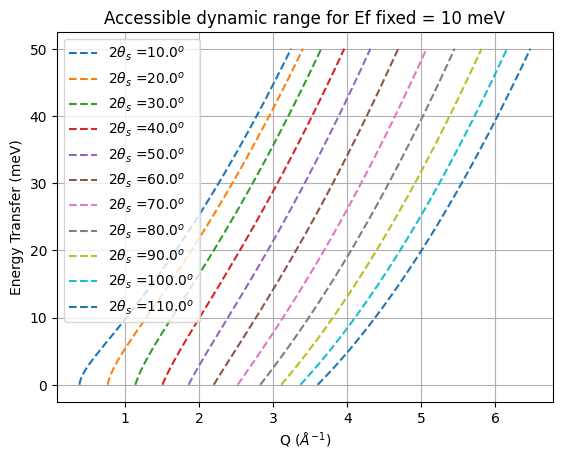

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, asin, acos, pi

import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, asin, acos, pi

class Lattice:
    def __init__(self, a=1.0, b=1.0, c=1.0, aa=90.0, bb=90.0, cc=90.0):
        """
        Class representing a crystallographic lattice.
        """
        self.a = a
        self.b = b
        self.c = c
        self.aa = np.deg2rad(aa)
        self.bb = np.deg2rad(bb)
        self.cc = np.deg2rad(cc)
        self.gtensor = self.compute_gtensor()
    
    
    def __str__(self):
        return f"""
        Lattice Parameters:
        a = {self.a:.4f}, b = {self.b:.4f}, c = {self.c:.4f}
        alpha = {np.rad2deg(self.aa):.3f}, beta = {np.rad2deg(self.bb):.3f}, gamma = {np.rad2deg(self.cc):.3f}
        """
    
    def compute_gtensor(self):
        """
        Compute and return the metric tensor of the lattice.
        """
        g = np.empty((3, 3))
        g[0, 0] = self.a ** 2
        g[0, 1] = self.a * self.b * np.cos(self.cc)
        g[0, 2] = self.a * self.c * np.cos(self.bb)
        g[1, 0] = g[0, 1]
        g[1, 1] = self.b ** 2
        g[1, 2] = self.b * self.c * np.cos(self.aa)
        g[2, 0] = g[0, 2]
        g[2, 1] = g[1, 2]
        g[2, 2] = self.c ** 2
        return g
    
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, asin, acos, pi

class Lattice:
    def __init__(self, a=1.0, b=1.0, c=1.0, aa=90.0, bb=90.0, cc=90.0):
        """
        Class representing a crystallographic lattice.
        """
        self.a = a
        self.b = b
        self.c = c
        self.aa = np.deg2rad(aa)
        self.bb = np.deg2rad(bb)
        self.cc = np.deg2rad(cc)
        self.gtensor = self.compute_gtensor()
    
    def __str__(self):
        return f"""
        Lattice Parameters:
        a = {self.a:.4f}, b = {self.b:.4f}, c = {self.c:.4f}
        alpha = {np.rad2deg(self.aa):.3f}, beta = {np.rad2deg(self.bb):.3f}, gamma = {np.rad2deg(self.cc):.3f}
        """
    
    def compute_gtensor(self):
        """
        Compute and return the metric tensor of the lattice.
        """
        g = np.empty((3, 3))
        g[0, 0] = self.a ** 2
        g[0, 1] = self.a * self.b * np.cos(self.cc)
        g[0, 2] = self.a * self.c * np.cos(self.bb)
        g[1, 0] = g[0, 1]
        g[1, 1] = self.b ** 2
        g[1, 2] = self.b * self.c * np.cos(self.aa)
        g[2, 0] = g[0, 2]
        g[2, 1] = g[1, 2]
        g[2, 2] = self.c ** 2
        return g
    
    def compute_volume(self):
        """
        Compute the unit cell volume.
        """
        return self.a * self.b * self.c * np.sqrt(1 - cos(self.aa)**2 - cos(self.bb)**2 - cos(self.cc)**2 + 2 * cos(self.aa) * cos(self.bb) * cos(self.cc))


def compute_reciprocal_lattice(lattice):
    """
    Compute and return the reciprocal lattice parameters.
    """
    volume = lattice.compute_volume()
    a_star = 2 * pi * lattice.b * lattice.c * sin(lattice.aa) / volume
    b_star = 2 * pi * lattice.a * lattice.c * sin(lattice.bb) / volume
    c_star = 2 * pi * lattice.a * lattice.b * sin(lattice.cc) / volume
    
    aa_star = acos((cos(lattice.bb) * cos(lattice.cc) - cos(lattice.aa)) / (sin(lattice.bb) * sin(lattice.cc)))
    bb_star = acos((cos(lattice.aa) * cos(lattice.cc) - cos(lattice.bb)) / (sin(lattice.aa) * sin(lattice.cc)))
    cc_star = acos((cos(lattice.aa) * cos(lattice.bb) - cos(lattice.cc)) / (sin(lattice.aa) * sin(lattice.bb)))
    
    return Lattice(a_star, b_star, c_star, np.rad2deg(aa_star), np.rad2deg(bb_star), np.rad2deg(cc_star))

def angle(V1, V2, lattice):
    """
    Compute the angle between two vectors in degrees.
    """
    g = lattice.gtensor
    dot_product = np.dot(V1, np.dot(g, V2))
    norm1 = np.sqrt(np.dot(V1, np.dot(g, V1)))
    norm2 = np.sqrt(np.dot(V2, np.dot(g, V2)))
    return np.degrees(np.arccos(dot_product / (norm1 * norm2)))

def run_cases(lattice, theta_angles, directions, wl, tth):
    """
    Compute Q vectors for different theta and directions.
    """
    for n, u in enumerate(directions):
        for theta in theta_angles:
            print(f'phi = {n * 45} deg, u = {u}, theta = {theta} deg')
            Q = calc_q(lattice, tth, theta, wl, u, [1, 1, 1])
            print(f'Q = {np.round(Q, 3)}')

def dynamic_range_plot(Efixed, E, E_max, theta_range=[10, 120], step=10):
    """
    Plot the accessible dynamic range in momentum-energy space.
    """
    omega = np.linspace(0, E_max, 100)
    theta_s = np.arange(theta_range[0], theta_range[1], step) * pi / 180
    Q = np.empty([theta_s.size, omega.size], float)

    if Efixed == "Ef":
        kf = np.sqrt(E / 2.072)
        ki = np.sqrt((omega + E) / 2.072)
    elif Efixed == "Ei":
        ki = np.sqrt(E / 2.072)
        kf = np.sqrt((E - omega) / 2.072)

    for i, theta in enumerate(theta_s):
        Q[i] = np.sqrt(ki**2 + kf**2 - 2 * ki * kf * np.cos(theta))
        plt.plot(Q[i], omega, '--', label=r"$2\theta_s$ =" f"{np.round(theta * 180 / pi, 1)}$^o$")
    
    plt.xlabel(r'Q ($\AA^{-1}$)')
    plt.ylabel('Energy Transfer (meV)')
    plt.title(f'Accessible dynamic range for {Efixed} fixed = {E} meV')
    plt.legend()
    plt.grid()
    plt.show()

def user_input_lattice():
    """
    Allow user to input lattice parameters and compute the reciprocal cell.
    """
    a = float(input("Enter lattice parameter a: "))
    b = float(input("Enter lattice parameter b: "))
    c = float(input("Enter lattice parameter c: "))
    aa = float(input("Enter angle alpha (degrees): "))
    bb = float(input("Enter angle beta (degrees): "))
    cc = float(input("Enter angle gamma (degrees): "))
    lattice = Lattice(a, b, c, aa, bb, cc)
    recip_lattice = compute_reciprocal_lattice(lattice)
    print("Reciprocal Lattice:")
    print(recip_lattice)
    return lattice, recip_lattice

def miller_indices(V, lattice):
    """
    Compute Miller indices from fractional coordinates.
    """
    g = lattice.gtensor
    h = (g[0, 0] * V[0] + g[1, 0] * V[1] + g[2, 0] * V[2]) / (2. * pi)
    k = (g[0, 1] * V[0] + g[1, 1] * V[1] + g[2, 1] * V[2]) / (2. * pi)
    l = (g[0, 2] * V[0] + g[1, 2] * V[1] + g[2, 2] * V[2]) / (2. * pi)
    return [h, k, l]

def vector_magnitude(V, lattice):
    """
    Compute magnitude of a vector given its Miller indices.
    """
    return np.sqrt(np.dot(V, np.dot(lattice.gtensor, V)))

def d_spacing(V, reciprocal_lattice):
    """
    Compute the d-spacing corresponding to given Miller indices.
    """
    return 2 * pi / vector_magnitude(V, reciprocal_lattice)

def bragg_angle(wavelength, q, reciprocal_lattice):
    """
    Compute Bragg angle for given wavelength and reciprocal lattice vector.
    """
    d = d_spacing(q, reciprocal_lattice)
    theta = np.degrees(asin(wavelength / (2 * d)))
    print(f"\td = {d:.3f}, wavelength = {wavelength:.2f}, Q = {q}, Two-theta = {2 * theta:.3f}")
    return 2 * theta

def calc_q(lattice, tth, th, wl=651, u=[1, 0, 0], v=[0, 0, 1], eV=True):
    """
    Compute the Q value for elastic scattering in Miller indices.
    If eV=True, the wavelength is treated as energy in eV and converted to inverse Angstroms.
    """
    if eV:
        wl = 12.398 / wl  # Convert eV to inverse Angstroms
    
    modQ = 4 * pi / wl * sin(np.radians(tth / 2))
    alpha = (180 - tth) / 2 + th
    
    reciprocal_lattice = compute_reciprocal_lattice(lattice)
    u, v = np.array(u, dtype=np.float64), np.array(v, dtype=np.float64)
    
    u /= np.linalg.norm(u)
    v -= np.dot(v, u) * u
    v /= np.linalg.norm(v)
    
    qx, qy = modQ * cos(np.radians(alpha)) * u, modQ * sin(np.radians(alpha)) * v
    return qx + qy


def dynamic_range(Efixed, E, E_max, theta_range=[10, 120], step=10, color='k',showplot=True):
    """
    Plot the accessible dynamic range in momentum-energy space.
    """
    omega = np.linspace(0, E_max, 100)
    theta_s = np.arange(theta_range[0] * np.pi / 180, theta_range[1] * np.pi / 180, step * np.pi / 180)
    Q = np.empty([theta_s.size, omega.size], float)

    if Efixed == "Ef":
        kf = np.sqrt(E / 2.072)
        ki = np.sqrt((omega + E) / 2.072)
    elif Efixed == "Ei":
        ki = np.sqrt(E / 2.072)
        kf = np.sqrt((E - omega) / 2.072)

    for i, theta in enumerate(theta_s):
        Q[i] = np.sqrt(ki ** 2 + kf ** 2 - 2 * ki * kf * np.cos(theta))
        
        if showplot:
            plt.plot(Q[i], omega, lw=1, ls='--', color=color)
            plt.text(Q[i, i + 25], omega[50], r"$2\theta$ =" f"{np.round(theta * 180 / np.pi, 1)}$^o$", 
                     bbox=dict(fc='1', lw=0, alpha=0.05), rotation=75, color=color)
    
    if showplot:
        plt.xlabel(r'Q ($\A^{-1}$)')
        plt.ylabel('Energy Transfer (meV)')
        plt.title(f'Accessible dynamic range for {Efixed} fixed = {E} meV')
        plt.grid(True)
        plt.show()
    
    return omega, Q

if __name__ == "__main__":
    lattice, recip_lattice = user_input_lattice()
    
    angle_between = angle([1, 0, 0], [0, 1, 0], recip_lattice)
    print(f"Angle between [1,0,0] and [0,1,0]: {angle_between:.3f} degrees")
    
    theta_angles = [10, 20, 30]
    directions = [[1, 0, 0], [0, 1, 0]]
    run_cases(lattice, theta_angles, directions, 1.54, 45)
    dynamic_range_plot("Ef", 10, 50)
